**Primera Parte**

*Data analysis and visualization*

In [3]:
# Importamos la librería pandas y la renombramos como pd para facilitar su uso
import pandas as pd

In [4]:
# Importamos la función drive de la librería google.colab
from google.colab import drive
# Montamos Google Drive en el entorno de Colab para acceder a los archivos
drive.mount('/content/drive')


Mounted at /content/drive


Mounted at /content/drive


In [5]:
# Leemos el archivo CSV "insurance.csv" desde la ruta en Google Drive y lo
# almacenamos en un DataFrame llamado data
data = pd.read_csv('/content/drive/MyDrive/python pruebas/insurance.csv')

In [6]:
# Muestra las primeras filas del DataFrame para visualizar los datos
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Devuelve las dimensiones del DataFrame en forma de (número de filas, número
# de columnas)
data.shape

(1338, 7)

In [8]:
# Imprime el número de filas en el conjunto de datos
print("The row count of the dataset is{}".format(data.shape[0]))

The row count of the dataset is1338


In [9]:
# Proporciona información sobre el DataFrame, incluyendo el tipo de datos y la
# cantidad de valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Calcula la cantidad de valores faltantes (NaN) por columna en el DataFrame
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Muestra estadísticas descriptivas para las columnas numéricas del DataFrame
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Calcula la cantidad de filas duplicadas en el DataFrame
data.duplicated().sum()

1

In [13]:
 # Elimina las filas duplicadas del DataFrame y modifica el DataFrame original
data.drop_duplicates(inplace=True)

In [14]:
# Calcula la cantidad de filas duplicadas después de eliminarlas del DataFrame
data.duplicated().sum()

0

In [15]:
# Importa la librería matplotlib.pyplot para visualización de gráficos
import matplotlib.pyplot as plt
# Importa la librería seaborn para una visualización más elegante
import seaborn as sns

In [16]:
# Calcula el recuento de valores únicos en la columna 'sex' del DataFrame
data.value_counts("sex")

sex
male      675
female    662
Name: count, dtype: int64

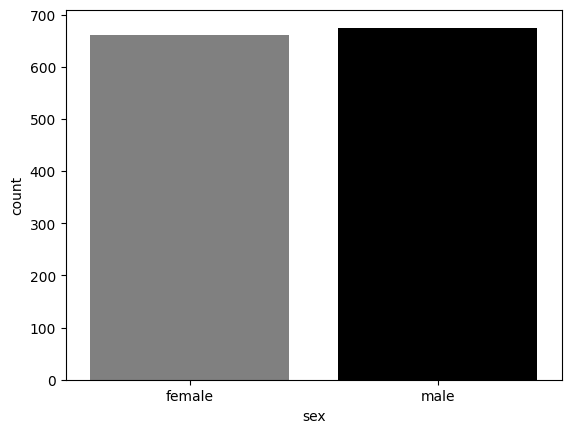

In [24]:
# Crea y muestra un gráfico de barras para visualizar la distribución de la variable 'sex'
sns.countplot(x="sex", data=data, hue="sex", palette={"female": "grey", "male": "black"}, legend=False)
plt.show()

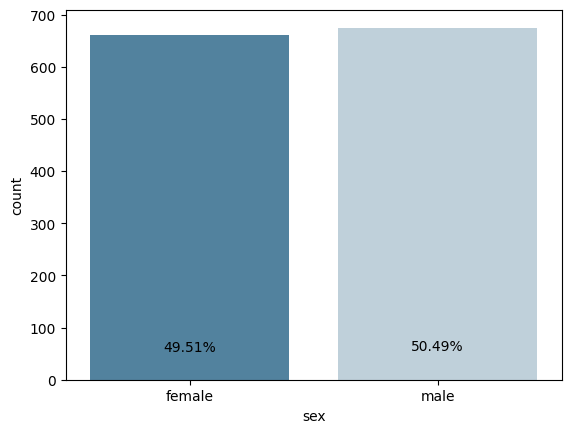

In [31]:
#Mismo grafico con otros colores e incluyendo las etiquetas de los %
# Calcular el porcentaje de cada categoría
percentage_female = (data['sex'] == 'female').mean() * 100
percentage_male = (data['sex'] == 'male').mean() * 100

# Crear el gráfico de barras
sns.countplot(x="sex", data=data, hue="sex", palette={"female": "#4685aa", "male": "#bad1df"}, legend=False)

# Añadir etiquetas de porcentaje
plt.text(0, percentage_female, f'{percentage_female:.2f}%', ha='center', va='bottom')
plt.text(1, percentage_male, f'{percentage_male:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

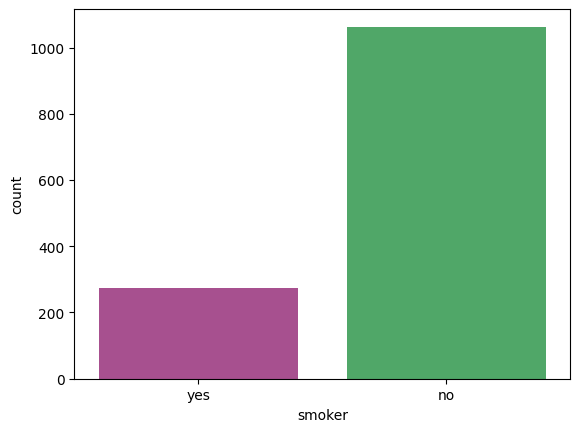

In [34]:
# Crea y muestra un gráfico de barras para visualizar la distribución de la variable 'smoker'
sns.countplot(x="smoker", data=data, hue="smoker", palette={"no": "#41b662", "yes": "#b64195"}, legend=False)
plt.show()

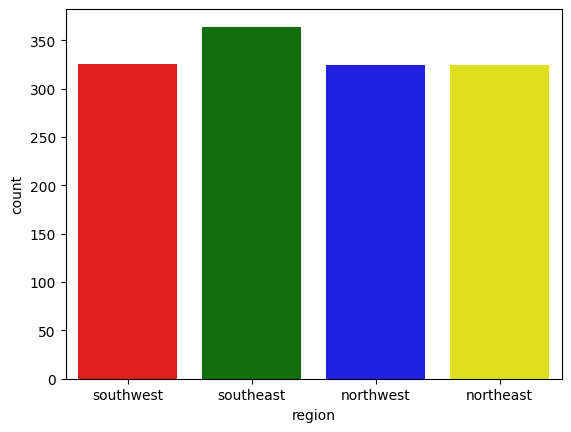

In [ ]:
# Crea y muestra un gráfico de barras para visualizar la distribución de la variable 'region' seleccionando color uno a uno
sns.countplot(x="region", data=data, hue="region", palette={"southwest": "red", "southeast": "green", "northwest": "blue", "northeast": "yellow"}, legend =False)
plt.show()

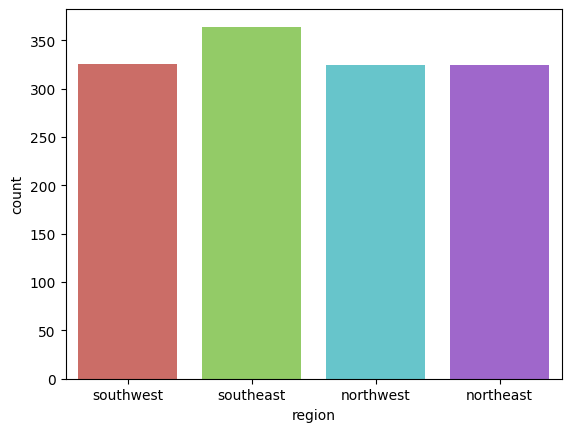

In [ ]:
# Definir la paleta de colores
palette = sns.color_palette("hls", 4)
# Crea y muestra un gráfico de barras para visualizar la distribución de la
# variable 'region' utilizando la paleta de colores que acabamos de definir
sns.countplot(x="region", data=data, hue="region", palette=palette, legend=False)
plt.show()


In [ ]:
# Importa el módulo preprocessing de scikit-learn para realizar preprocesamiento de datos
from sklearn import preprocessing

In [ ]:
# Crea una instancia de LabelEncoder para convertir variables categóricas en numéricas
labelencoder = preprocessing.LabelEncoder()

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Convierte las variables 'smoker', 'sex' y 'region' de categórica a numérica
# usando LabelEncoder
data["smoker"] = labelencoder.fit_transform(data["smoker"])
data["sex"] = labelencoder.fit_transform(data["sex"])
data["region"] = labelencoder.fit_transform(data["region"])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# Calcula la correlación de Pearson entre todas las variables y 'charges', y
# las ordena de forma descendente
data.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

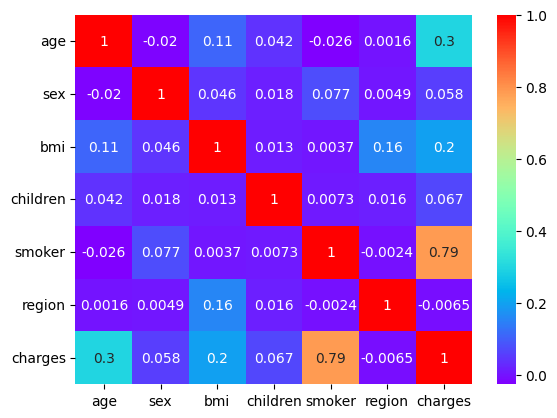

In [ ]:
# Crea un mapa de calor para visualizar la matriz de correlación entre todas
# las variables
sns.heatmap(data.corr(), annot = True, cmap = "rainbow")

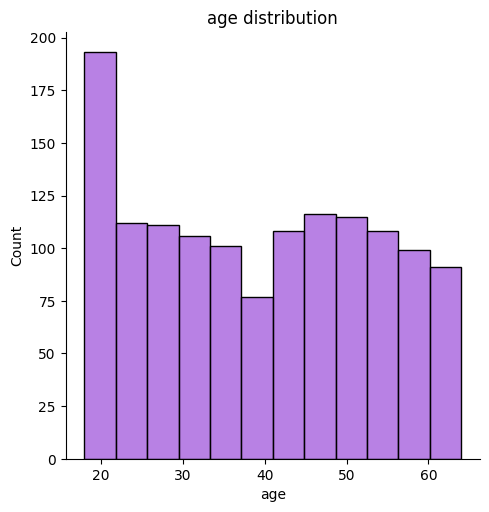

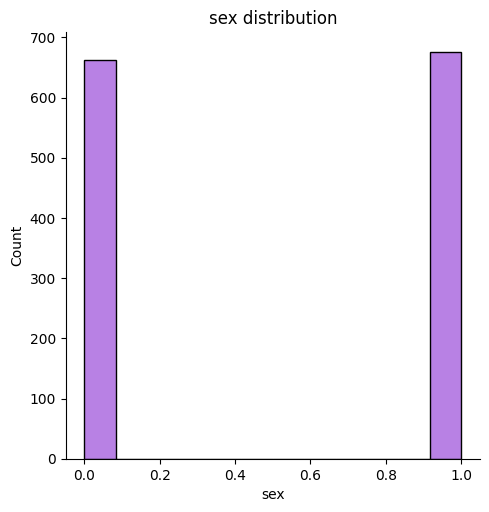

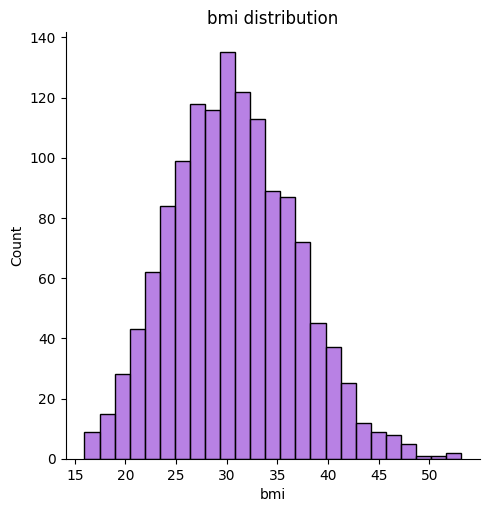

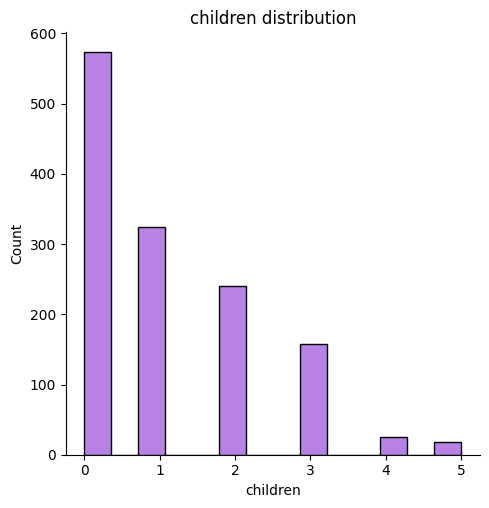

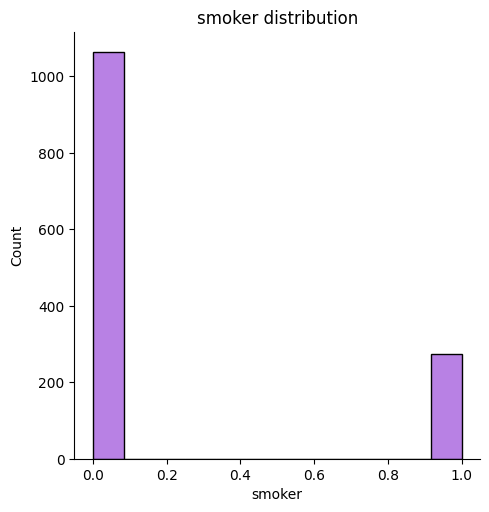

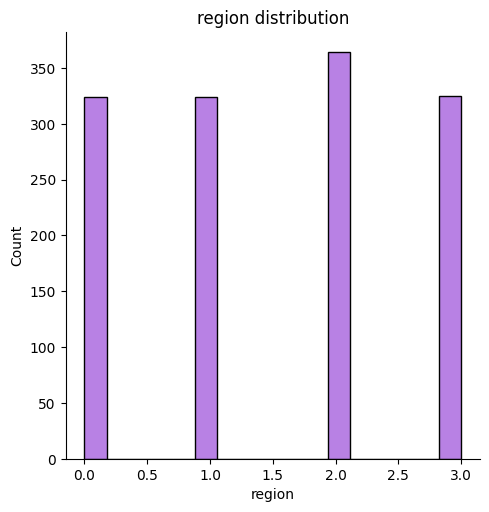

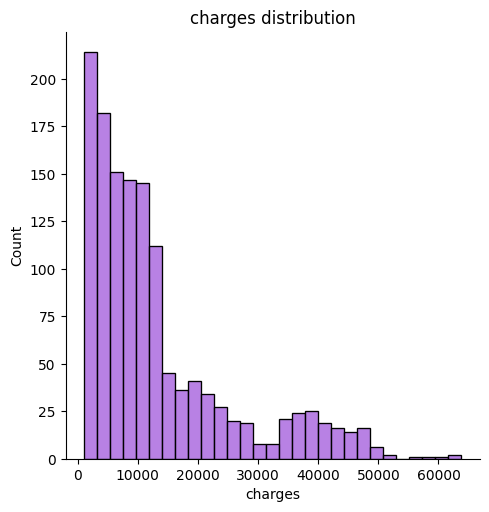

In [ ]:
# Genera un gráfico de distribución para cada columna en el DataFrame data,
# utilizando un loop que itera sobre cada columna
for i in data.columns:
  sns.displot(data[i], color=palette[3])
  plt.title(i+" "+ "distribution")
  plt.show()

In [ ]:
# Lista de colores para asignar a diferentes gráficos
colorsforx = ["Red", "Green", "Yellow", "Black", "Blue", "Grey"]
# Variable para rastrear el índice del color en la lista 'colorsforx'
colorchanger = 0

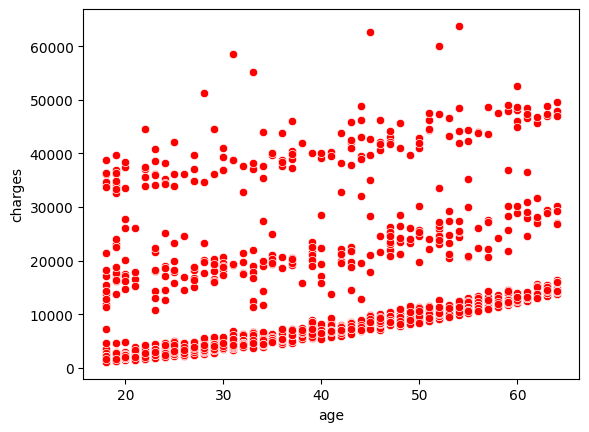

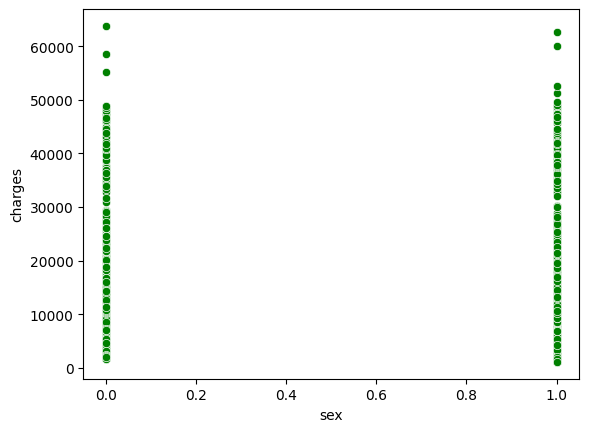

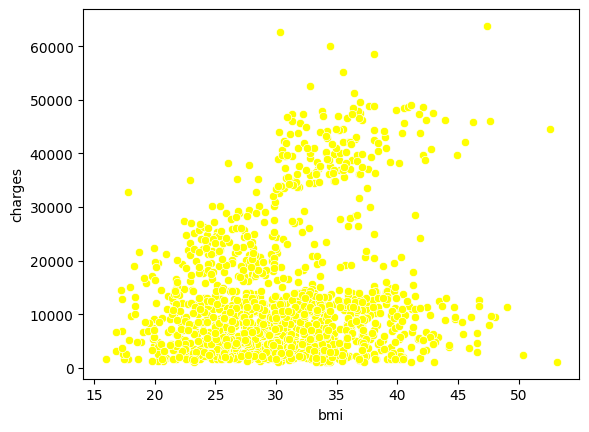

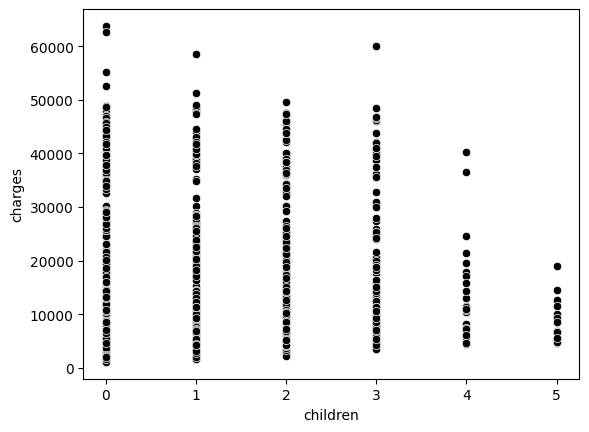

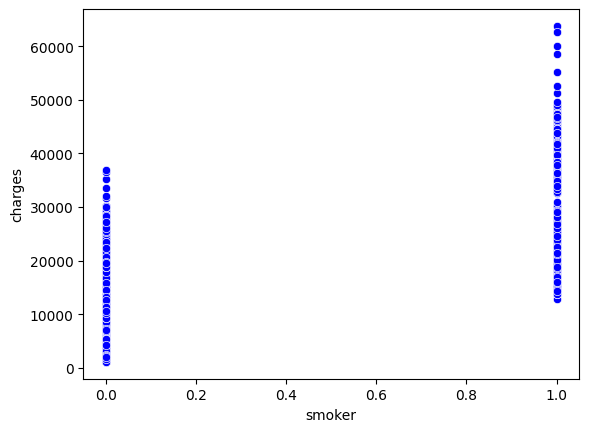

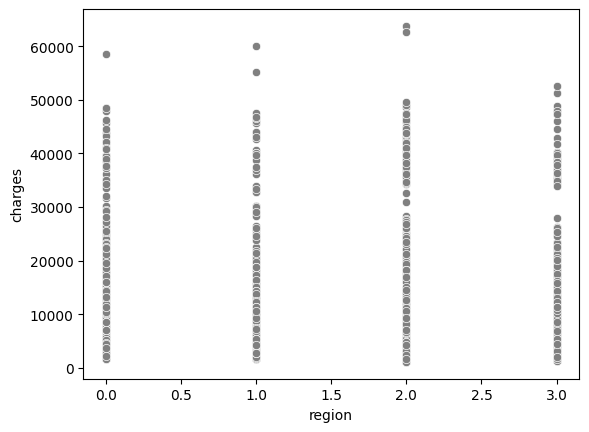

In [ ]:
# Crea gráficos de dispersión para cada columna en data, excepto la última
# (asumiendo que es la variable objetivo), con "charges" en el eje y y un color
# diferente para cada gráfico, según la lista colorsforx.
for i in data.columns[:-1]:
  sns.scatterplot(data = data, x = i, y= "charges", color =colorsforx[colorchanger])
  plt.show()
  colorchanger +=1

**Segunda Parte**

*Machine Learning*


Continuar con lo anterior o empezar desde aquí

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Importamos la función drive de la librería google.colab
from google.colab import drive
# Montamos Google Drive en el entorno de Colab para acceder a los archivos
drive.mount('/content/drive')

# Crear un objeto LabelEncoder para convertir variables categóricas en numéricas
labelencoder = preprocessing.LabelEncoder()

# Leer el conjunto de datos desde un archivo CSV
data = pd.read_csv('/content/drive/MyDrive/python pruebas/insurance.csv')

# Eliminar filas duplicadas en el conjunto de datos
data.drop_duplicates(inplace=True)

# Convertir las variables categóricas 'smoker', 'sex' y 'region' en variables numéricas utilizando LabelEncoder
data["smoker"] = labelencoder.fit_transform(data["smoker"])
data["sex"] = labelencoder.fit_transform(data["sex"])
data["region"] = labelencoder.fit_transform(data["region"])

# Mostrar las primeras filas del conjunto de datos después de la conversión
data.head()

Mounted at /content/drive


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
# Seleccionar las características predictoras (features) y la variable objetivo (target)
X = data [["age","sex","bmi","children","smoker","region"]] # Características predictoras
y = data [["charges"]] # Variable objetivo

In [4]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
# Utilizando train_test_split de scikit-learn
from sklearn.model_selection import train_test_split

# Dividir X e y en conjuntos de entrenamiento (train) y prueba (test)
# Utilizando un tamaño de prueba del 30%
x_train , x_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [5]:
# Escalar las características utilizando StandardScaler de scikit-learn
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Escalar las características del conjunto de entrenamiento
scaled_x_train = scaler.fit_transform(x_train)

# Escalar las características del conjunto de prueba
scaled_x_test = scaler.fit_transform(x_test)

In [6]:
# Importar métricas de evaluación de modelos desde scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definir una función para mostrar los resultados del modelo
def modelresults(predictions):
  # Calcular y mostrar el error absoluto medio del modelo
  print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
  # Calcular y mostrar el error cuadrático medio del modelo
  print("Mean squared error on model is {}".format(mean_squared_error(y_test,predictions)))

In [7]:
# Importar el modelo de regresión lineal desde scikit-learn
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de regresión lineal
lr = LinearRegression()

# Entrenar el modelo de regresión lineal con las características escaladas de
# entrenamiento y las etiquetas de entrenamiento
lr.fit(scaled_x_train,y_train)

LinearRegression()

In [8]:
# Realizar predicciones utilizando el modelo de regresión lineal
predslr = lr.predict(scaled_x_test)

# Mostrar los resultados del modelo de regresión lineal
modelresults(predslr)

Mean absolute error on model is 4330.280390968359
Mean squared error on model is 38201490.8221121


In [9]:
# Convertir y_train a un array unidimensional utilizando np.ravel
y_train = np.ravel(y_train)

In [10]:
# Importar el modelo de SVM para regresión (SVR) y la función GridSearchCV para búsqueda de hiperparámetros
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Crear una instancia del modelo SVR
svrmodel = SVR()

# Definir el espacio de búsqueda de hiperparámetros para SVR
param_gridsrv = {"C": [0.001,0.01,0.1,0.5,1], "kernel":["linear","rbf", "poly"], "gamma": ["scale", "auto"], "degree":[2,3,4,5]}

# Crear una instancia de GridSearchCV para encontrar los mejores hiperparámetros
gridsvr = GridSearchCV(svrmodel,param_gridsrv)

# Entrenar el modelo SVR con los datos de entrenamiento escalados
gridsvr.fit(scaled_x_train,y_train)

# Imprimir los mejores parámetros encontrados por GridSearchCV
print("Best parameter for model is {}".format(gridsvr.best_params_))


Best parameter for model is {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [11]:
# Realizar predicciones utilizando el modelo SVR optimizado
predsgridsvr = gridsvr.predict(scaled_x_test)

# Mostrar los resultados del modelo SVR optimizado
modelresults(predsgridsvr )

Mean absolute error on model is 7454.548992154899
Mean squared error on model is 131798307.61790128


In [12]:
# Importar el modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Crear una instancia del modelo RandomForestRegressor
rfrmodel = RandomForestRegressor()

# Definir el espacio de búsqueda de hiperparámetros para RandomForestRegressor
param_gridrfr = {"bootstrap": [True], # Si se deben utilizar muestras de arranque
                 "max_depth":[5,10,15], # Profundidad máxima del árbol
                 "n_estimators":[2,3,4,5,6,7,8,9,10]} # Número de árboles en el bosque

 # Crear una instancia de GridSearchCV para encontrar los mejores hiperparámetros
gridrfr = GridSearchCV(rfrmodel,param_gridrfr)

# Entrenar el modelo RandomForestRegressor con los datos de entrenamiento escalados
gridrfr.fit(scaled_x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [13]:
# Realizar predicciones utilizando el modelo RandomForestRegressor optimizado
predsgridrfr = gridrfr.predict(scaled_x_test)

# Mostrar los resultados del modelo RandomForestRegressor optimizado
modelresults(predsgridrfr )

Mean absolute error on model is 2590.537747924649
Mean squared error on model is 21368244.317667395


In [14]:
# Obtener los nombres de las características (columnas) de X
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [15]:
# Iterar sobre las columnas de X y calcular la media de cada columna en el conjunto de datos original
columniterate = 1
for index in X.columns:
  mean = data[index].mean()
  print("The mean of the column {} is {}".format(columniterate, mean))
  columniterate += 1

The mean of the column 1 is 39.222139117427076
The mean of the column 2 is 0.5048616305160808
The mean of the column 3 is 30.66345175766642
The mean of the column 4 is 1.0957367240089753
The mean of the column 5 is 0.2049364248317128
The mean of the column 6 is 1.5160807778608825


In [16]:
# Las características del nuevo cliente con el cual se va a probar el modelo
# entrenado para hacer predicciones
newcostumer = np.array([39,0,30,1,0,1])

In [17]:
# Realizar la predicción del charge del insurance utilizando el modelo RandomForestRegressor entrenado
gridrfr.predict(newcostumer.reshape(1,-1))

array([17215.70857415])

In [18]:
# Mostrar la predicción de otra manera
print("Predicted insurance charge for the new customer: {}".format(gridrfr.predict(newcostumer.reshape(1,-1))))

Predicted insurance charge for the new customer: [17215.70857415]
